# 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('/content/sample_data/employee.csv')
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [3]:
data.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


In [4]:
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

# 2.Reset the index as "name".

In [12]:
data2=data.set_index(['name'])
data2

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 3. Select rows for specific names Jack Morgan and Josh wills.

In [13]:
name_row=data2.loc[['Jack Morgan','Josh Wills']]
name_row

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”.

In [14]:
data2.loc[data2['department'].isin(['Finance','Sales'])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5. Display employee who has more than 700 performance score

In [15]:
data2[data2['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6. Display employee who has more than 500 and less than 700 performance score

In [16]:
data2[(data2['performance_score']>500) & (data2['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7. Check and handle missing values in the dataset.

In [27]:
data2.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [28]:
data2.isnull()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,False,True,True,False,False,False
S Kumar,True,False,False,False,False,False
Jack Morgan,False,False,False,False,False,False
Ying Chin,False,False,False,False,False,False
Dheeraj Patel,False,False,False,False,False,False
Satyam Sharma,True,False,True,False,False,False
James Authur,False,True,False,False,False,False
Josh Wills,False,False,False,False,False,False
Leo Duck,False,False,False,False,False,False


In [29]:
for i in ['age','income']:
  data2[i]=data2[i].fillna(data2[i].median())
data2

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,NaN,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,NaN,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [31]:
data2= data2.fillna({'gender':'M'})
data2

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,M,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,M,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [32]:
data2.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

Now the missing values are filled.

# 8. Check the outliers and handle outliers in performance score using Percentiles

Text(0.5, 1.0, 'Box plot of performance score')

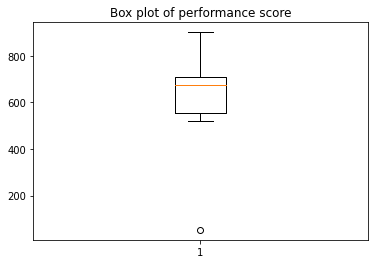

In [37]:
plt.boxplot(data2['performance_score'])
plt.title('Box plot of performance score')

In [38]:
Q1=np.percentile(data2['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(data2['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(data2['performance_score'],75,interpolation='midpoint')
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('lower limit=',low_lim)
print('upper limit=',up_lim)
outlier=[]
for x in data2['performance_score']:
  if((x>up_lim)or (x<low_lim)):
    outlier.append(x)
print('outliers=',outlier)
ind1=data2['performance_score']<low_lim 
data2.loc[ind1].index

Q1= 556.0
Q2= 674.0
Q3= 711.0
lower limit= 323.5
upper limit= 943.5
outliers= [53]


Index(['James Authur'], dtype='object', name='name')

In [42]:
data2.drop(['James Authur'],inplace=True)
data2

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,M,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,M,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


Text(0.5, 1.0, 'Box plot of performance score')

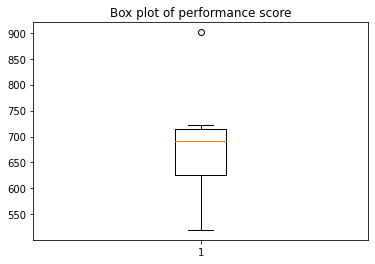

In [45]:
plt.boxplot(data2['performance_score'])
plt.title('Box plot of performance score')

Now the outlier is cleared. 

# 9. Check the gender column and do Dummy encoding.

In [46]:
data_dumm=pd.get_dummies(data2,columns=['gender'])
data_dumm

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,723,0,1
S Kumar,45.0,16000.0,Finance,G0,520,1,0
Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
Ying Chin,45.0,65000.0,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0
Satyam Sharma,45.0,62000.0,Sales,G3,649,0,1
Josh Wills,54.0,52000.0,Finance,G3,901,1,0
Leo Duck,23.0,98000.0,Sales,G4,709,0,1


# 10. Do the standard scaling on the feature performance score.

In [63]:
x=pd.DataFrame(data2['performance_score'])

In [61]:
x.describe()

,performance_score
count,9.000000
mean,610.666667
std,235.671912
min,53.000000
25%,556.000000
50%,674.000000
75%,711.000000
max,901.000000


In [62]:
from sklearn import preprocessing
standardisation=preprocessing.StandardScaler()
x=standardisation.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

,0
count,9.000000e+00
mean,1.912051e-16
std,1.060660e+00
min,-2.509823e+00
25%,-2.460317e-01
50%,2.850367e-01
75%,4.515581e-01
max,1.306668e+00
